**Aim**: -  Multiple Linear Regression in Python and R.

**Lab Outcomes (LO):** Implement various Regression techniques for prediction. (LO2)

**Tasks performed: -**
1. Listed the packages used for multiple linear regression.
2. Downloaded a dataset from kaggle.
    https://www.kaggle.com/code/divan0/multiple-linear-regression/input
3. Created a model and fit it.
4. Printed value of Coefficient of Determination, Intercept and Coefficients.
5. Predicted the response
6. Visualized the results with a graph.



**Packages Used**: matplotlib,numpy,seaborn,pandas.




In [75]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

#importing dataset using panda
dataset = pd.read_csv('/content/kc_house_data.csv')
#to see what my dataset is comprised of
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


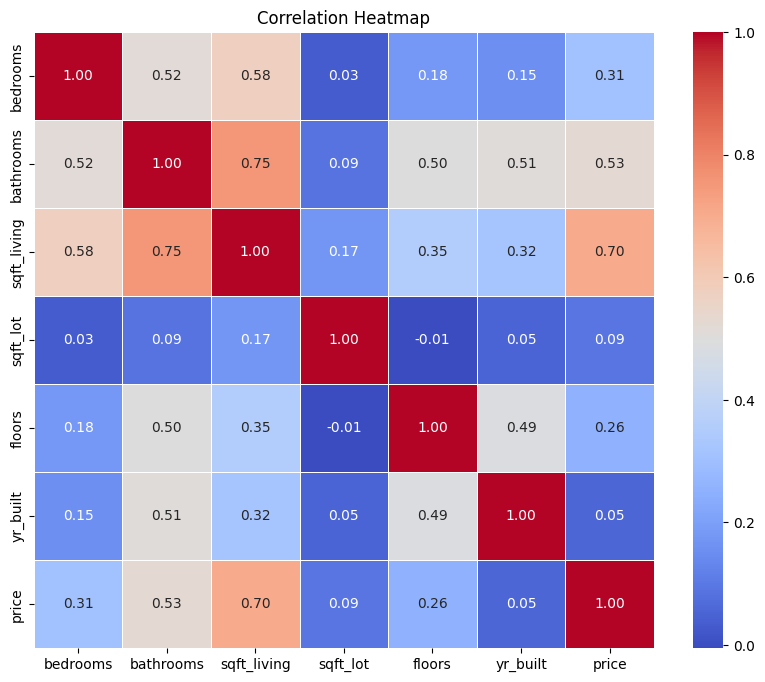

In [76]:
X_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

y_column = 'price'

# Extract the specified columns
selected_columns = X_columns + [y_column]
selected_data = dataset[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



In [77]:
print(dataset.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [93]:
# dataset = dataset.drop(['waterfront','view','condition','sqft_basement','lat','long','sqft_living15','sqft_lot15'], axis = 1)

# dataset = dataset.drop(['grade'], axis = 1)
# dataset = dataset.drop(['sqft_above'], axis = 1)


# dataset = dataset.drop(['zipcode'], axis = 1)
# dataset = dataset.drop(['id'], axis = 1)
# dataset = dataset.drop(['date'], axis = 1)
# dataset = dataset.drop(['yr_renovated'], axis = 1)
dataset = dataset.drop(['sqft_living'], axis = 1)
#yr_built,floors


In [94]:

dataset.head()

,price,bedrooms,bathrooms,sqft_lot,floors,yr_built
0,221900.0,3,1.00,5650,1.0,1955
1,538000.0,3,2.25,7242,2.0,1951
2,180000.0,2,1.00,10000,1.0,1933
3,604000.0,4,3.00,5000,1.0,1965
4,510000.0,3,2.00,8080,1.0,1987


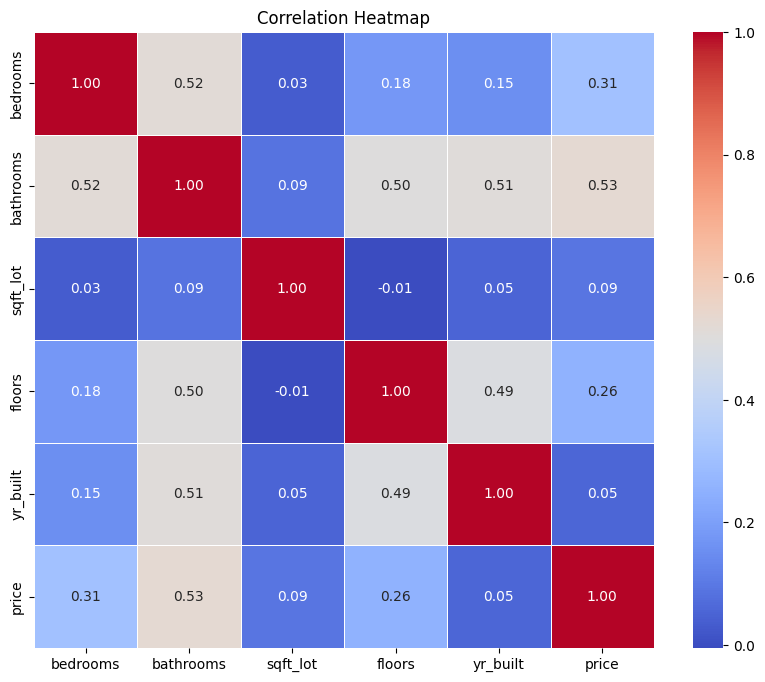

In [96]:
X_columns = ['bedrooms','bathrooms', 'sqft_lot', 'floors', 'yr_built']
y_column = 'price'

# Extract the specified columns
selected_columns = X_columns + [y_column]
selected_data = dataset[selected_columns]

# Compute the correlation matrix
correlation_matrix = selected_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [97]:
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values


In [98]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)


In [99]:
# print(X_train)
# print(y_train)
X_columns = dataset.columns[1:]
y_column = dataset.columns[0]
print("Column labels of X:")
print(X_columns)

print("\nColumn label of y:")
print(y_column)

Column labels of X:
Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'yr_built'], dtype='object')

Column label of y:
price


In [100]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


y_pred = regressor.predict(X_test)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

93444292853.67505
0.35261015982885857


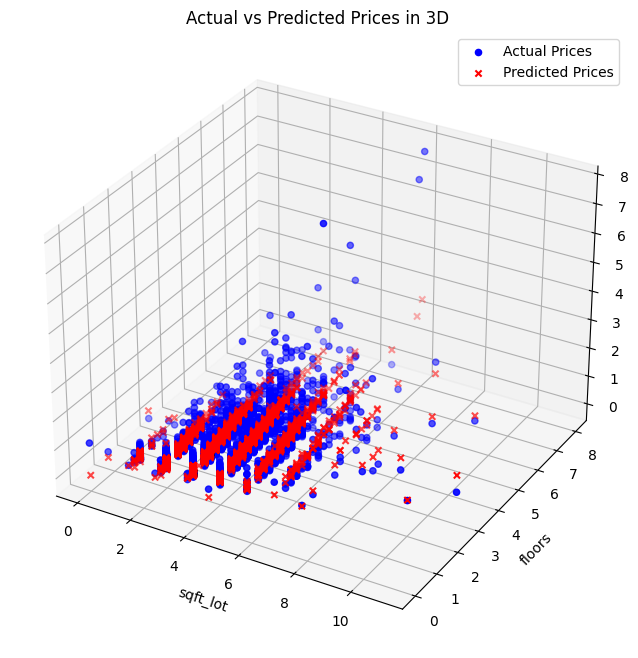

In [102]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test[:, 0], X_test[:, 1], y_test, c='blue', marker='o', label='Actual Prices')


ax.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='red', marker='x', label='Predicted Prices')


ax.set_xlabel(X_columns[2])
ax.set_ylabel(X_columns[3])
ax.set_zlabel(y_column)

ax.legend()

plt.title("Actual vs Predicted Prices in 3D")
plt.show()

Using **R**

In [ ]:
install.packages("scatterplot3d")

library(scatterplot3d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
dataset <- read.csv('/content/kc_house_data.csv')

In [ ]:
X_columns <- c('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built')
y_column <- 'price'

In [ ]:
X <- dataset[, X_columns]
y <- dataset[, y_column]

cat("X Columns: ", paste(X_columns, collapse = ', '), "\n")

# Print y column name
cat("y Column: ", y_column, "\n")

X Columns:  bedrooms, bathrooms, sqft_living, sqft_lot, floors, yr_built 
y Column:  price 


In [ ]:
set.seed(42)  # Set seed for reproducibility
sample_indices <- sample(1:nrow(dataset), 0.8 * nrow(dataset))
train_data <- dataset[sample_indices, ]
test_data <- dataset[-sample_indices, ]

In [ ]:
model <- lm(price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + yr_built, data = train_data)

In [ ]:
y_pred <- predict(model, newdata = test_data)

Warning message in title(main, sub, ...):
“"add" is not a graphical parameter”
Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"add" is not a graphical parameter”


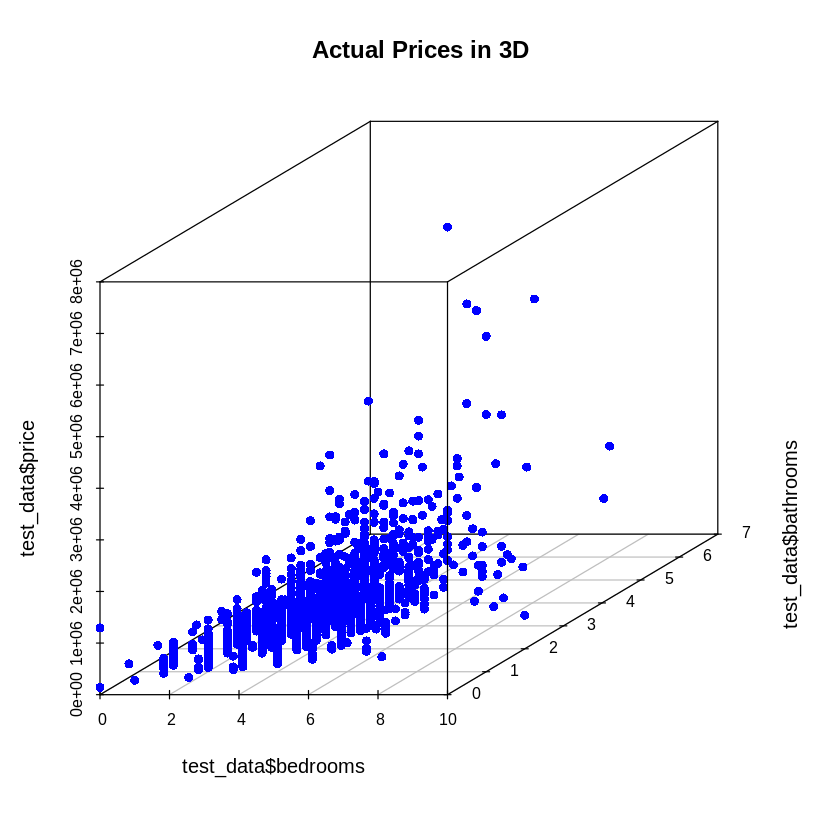

ERROR: Error in xlabel3d("Bedrooms"): could not find function "xlabel3d"


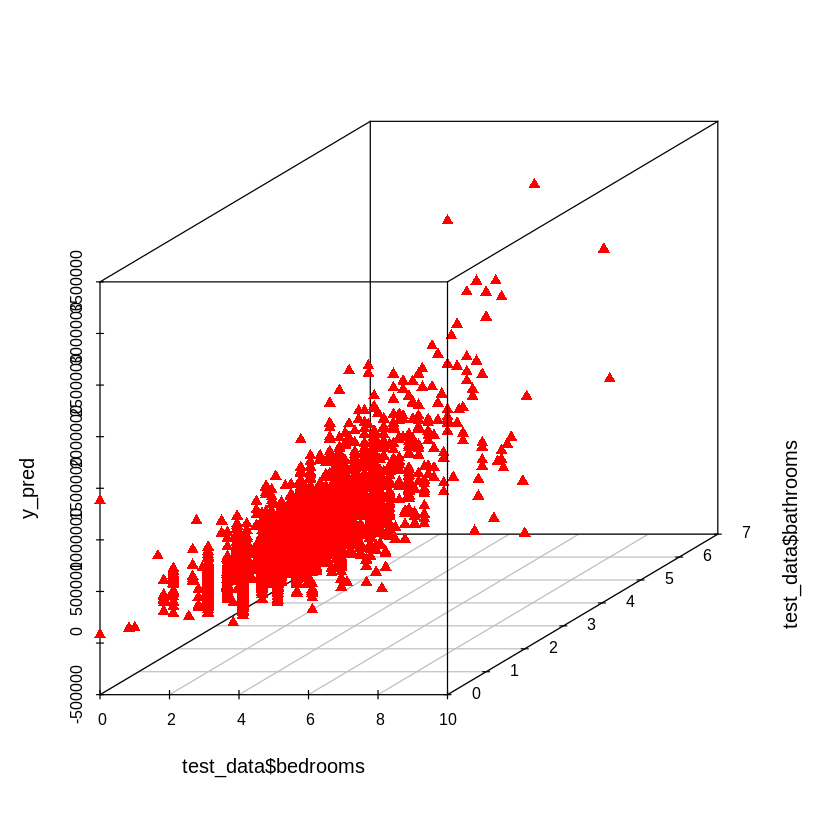

In [ ]:


scatterplot3d(test_data$bedrooms, test_data$bathrooms, test_data$price, color = 'blue', pch = 16, main = "Actual Prices in 3D")


scatterplot3d(test_data$bedrooms, test_data$bathrooms, y_pred, color = 'red', pch = 17, add = TRUE)
xlabel3d("Bedrooms")
ylabel3d("Bathrooms")
zlabel3d("Price")


legend("topright", legend = c("Actual Prices", "Predicted Prices"), col = c('blue', 'red'), pch = c(16, 17))

title("Actual vs Predicted Prices in 3D")

rgl::rglwidget()


In [ ]:
intercept <- coef(model)[1]
coefficients <- coef(model)[-1]  # Exclude the intercept
r_squared <- summary(model)$r.squared

# Print the results
cat("Intercept:", intercept, "\n")
cat("Coefficients:", coefficients, "\n")
cat("R-squared:", r_squared, "\n")

Intercept: 6641681 
Coefficients: -65993.53 72206.04 296.4277 -0.2409122 52125.32 -3410.631 
R-squared: 0.5566184 


## **Conclusion: -**

*   Understood the concept of Multiple Linear Regression
*   Explored the packages in Python and R
*   Performed Multiple Linear Regression using the Libraries in Python and R


